## fuzzy control

from:
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

In [1]:
%matplotlib notebook
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')


In [3]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)


In [4]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


<IPython.core.display.Javascript object>


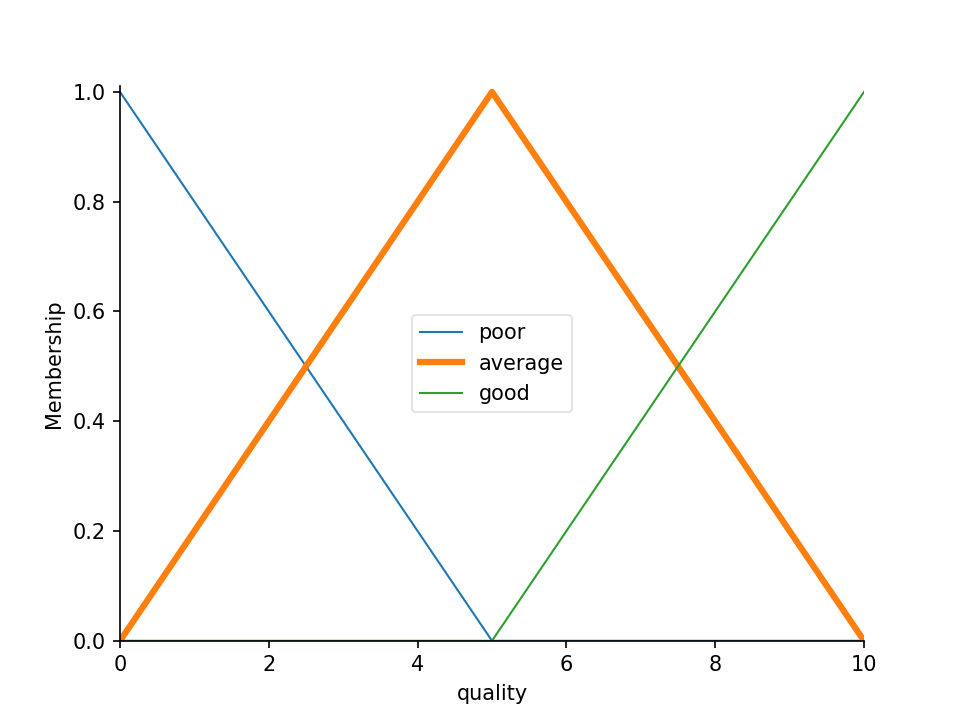

In [5]:
quality['average'].view()

<IPython.core.display.Javascript object>


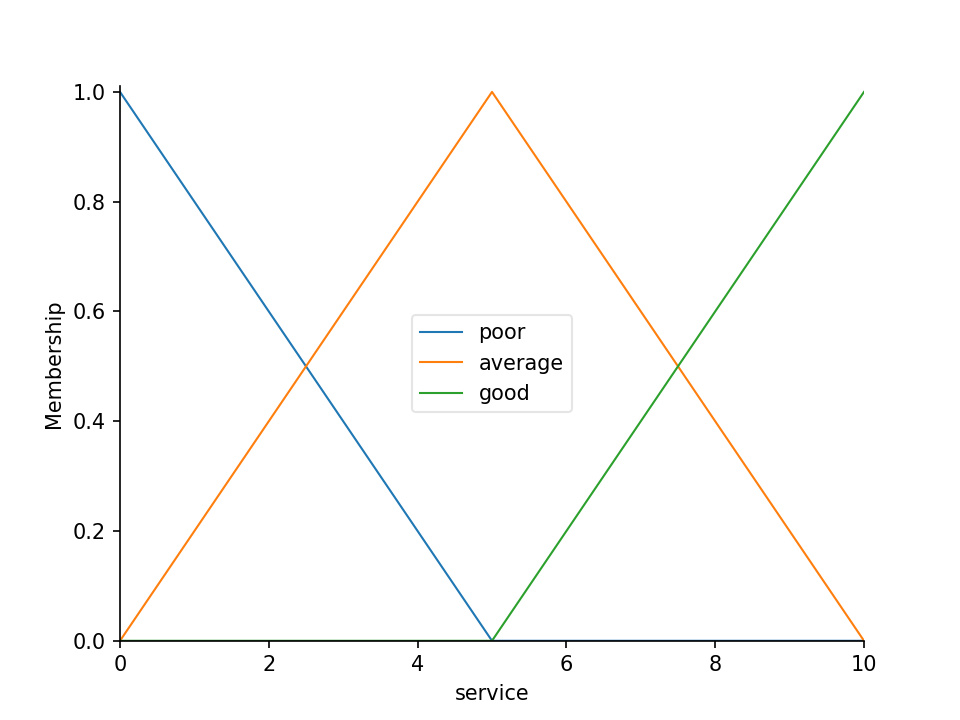

In [6]:
service.view()

<IPython.core.display.Javascript object>


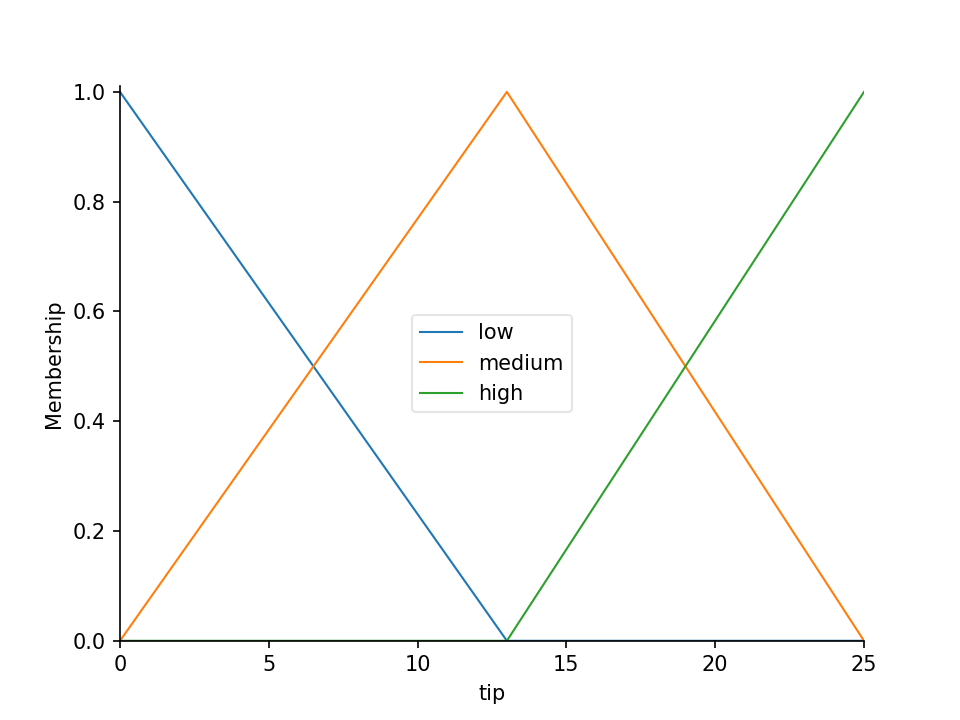

In [7]:
tip.view()

In [8]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

<IPython.core.display.Javascript object>


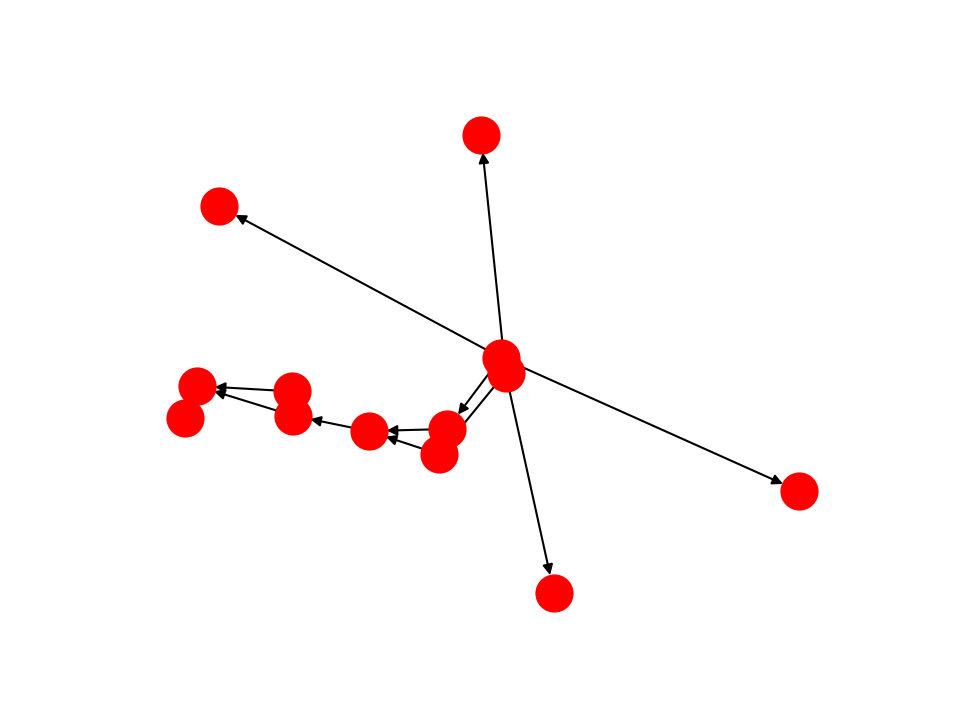

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x238282b3da0>)

In [9]:
rule1.view()

In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [11]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

19.847607361963192


<IPython.core.display.Javascript object>


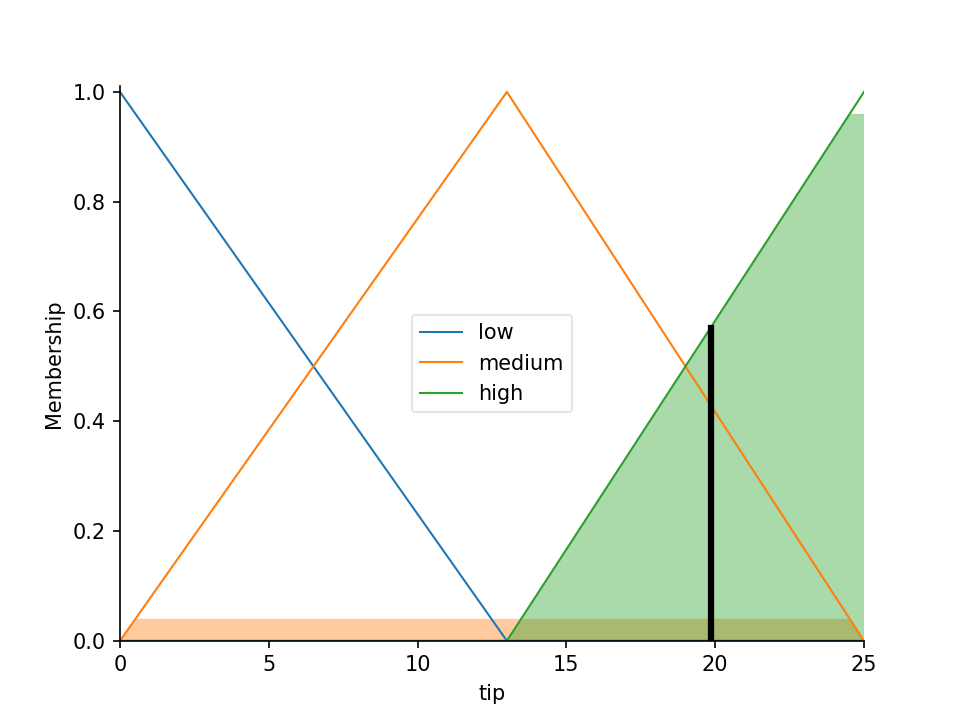

In [12]:
# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)